# <h1 style="color:Magenta;">Laptop Price Prediction</h1>

### Dataset Description: 
This dataset is a comprehensive collection of data aimed at facilitating the development and evaluation of machine learning models for predicting the prices of laptops. This dataset encompasses a wide array of features including specifications, brand, and physical attributes of laptops, thereby offering a robust foundation for predictive analytics
The dataset includes around 800 entries, each representing a unique laptop model, with attributes such as processor type, RAM size, storage capacity, screen size, brand, operating system, and more. Additionally, the dataset is enriched with categorical and numerical data, enabling a diverse range of analytical techniques from regression to classification.


## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\laptop_train.csv",header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,219,248,Dell,Inspiron 3501 Laptop,52500,69.323529,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",8GB,DDR4,1TB,Hard-Disk,Intel Iris Xe Graphics,15.6,1920.0,1080.0,Windows 10 OS,1.0
1,380,421,Infinix,INBook Y1 Plus XL28 Laptop,25990,69.323529,10th Gen Intel Core i3 1005G1,"Dual Core, 4 Threads",8GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,15.6,1920.0,1080.0,Windows 11 OS,1.0
2,290,326,Dell,Inspiron 7430 2 in 1 Touch Laptop,95640,60.000000,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,1TB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1200.0,Windows 11 OS,1.0
3,194,218,Samsung,Galaxy Book 3 NP750XFG-KB1IN Laptop,69990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",8GB,LPDDR4x,512GB,NaN,Intel Iris Xe Graphics,15.6,1920.0,1080.0,Windows 11 OS,1.0
4,516,584,Dell,Inspiron 15 3511 Laptop,52990,69.323529,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",NaN,DDR4,512GB,SSD,Intel Integrated UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1.0


In [3]:
df_test=pd.read_csv(r"C:\Users\Admin\Downloads\laptop_test.csv",header=0)
df_test.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,521,589,Lenovo,V15-IGL 82C3A008IH Laptop,69.323529,Intel Celeron N4020,"Dual Core, 2 Threads",4GB,DDR4,256GB,SSD,Intel Integrated UHD,15.6,1920,1080,DOS OS,1.0
1,135,149,Acer,Aspire 5 14 A514-56GM 2023 Gaming Laptop,67.000000,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,DDR4,512GB,SSD,4GB NVIDIA GeForce RTX 2050,14.0,1920,1080,Windows 11 OS,1.0
2,867,955,LG,Gram 14 2023 14Z90R Laptop,70.000000,13th Gen Intel Core i5 1340P,"12 Cores (4P + 8E), 16 Threads",8GB,LPDDR5,512GB,SSD,Intel Iris Xe Graphics,14.0,1200,1920,Windows 11 OS,1.0
3,201,226,Dell,Inspiron 3520 Laptop,69.323529,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",8GB,DDR4,1TB,Hard-Disk,Intel Iris Xe Graphics,15.6,1920,1080,Windows 11 OS,1.0
4,242,272,Lenovo,IdeaPad Slim 3 14ITL6 82H701N3IN Laptop,60.000000,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",NaN,DDR4,512GB,SSD,Intel UHD Graphics,14.0,1920,1080,Windows 11 OS,1.0


## Using info function to display the summary 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       785 non-null    int64  
 1   Unnamed: 0         785 non-null    int64  
 2   brand              785 non-null    object 
 3   name               785 non-null    object 
 4   price              785 non-null    int64  
 5   spec_rating        785 non-null    float64
 6   processor          785 non-null    object 
 7   CPU                785 non-null    object 
 8   Ram                764 non-null    object 
 9   Ram_type           785 non-null    object 
 10  ROM                771 non-null    object 
 11  ROM_type           752 non-null    object 
 12  GPU                785 non-null    object 
 13  display_size       785 non-null    float64
 14  resolution_width   785 non-null    float64
 15  resolution_height  785 non-null    float64
 16  OS                 761 non

## Displaying Descriptive Statistics Information.

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,751.000000
mean,468.084076,522.391083,80139.829299,69.474934,15.179185,2031.141401,1218.659873,1.081225
std,271.015688,300.804383,59592.816382,5.472768,0.945572,424.546987,329.611781,0.326691
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,234.000000,264.000000,44990.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,470.000000,534.000000,62990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,704.000000,786.000000,91990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       108 non-null    int64  
 1   Unnamed: 0         108 non-null    int64  
 2   brand              108 non-null    object 
 3   name               108 non-null    object 
 4   spec_rating        108 non-null    float64
 5   processor          108 non-null    object 
 6   CPU                108 non-null    object 
 7   Ram                103 non-null    object 
 8   Ram_type           108 non-null    object 
 9   ROM                105 non-null    object 
 10  ROM_type           106 non-null    object 
 11  GPU                108 non-null    object 
 12  display_size       108 non-null    float64
 13  resolution_width   108 non-null    int64  
 14  resolution_height  108 non-null    int64  
 15  OS                 101 non-null    object 
 16  warranty           98 non-

In [7]:
df_test.describe()

,Unnamed: 0.1,Unnamed: 0,spec_rating,display_size,resolution_width,resolution_height,warranty
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,98.000000
mean,460.240741,514.055556,68.681917,15.134259,2066.296296,1215.888889,1.040816
std,265.415029,294.654679,5.999097,0.893817,437.802056,306.644893,0.318449
min,1.000000,1.000000,60.000000,13.300000,1200.000000,768.000000,0.000000
25%,246.500000,277.250000,65.000000,14.000000,1920.000000,1080.000000,1.000000
50%,441.000000,504.500000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,677.750000,759.750000,69.323529,15.600000,1920.000000,1200.000000,1.000000
max,916.000000,1005.000000,89.000000,17.300000,3840.000000,2400.000000,2.000000


## Dropping the two columns Unnamed 0.1 and Unnamed 0 as it has a Unique value. It is irrelevant to predict the price of a Laptop

In [8]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],inplace=True,axis=1)
df_test.drop(['Unnamed: 0.1','Unnamed: 0'],inplace=True,axis=1)

## Checking the shape of the dataframe

In [9]:
print(df.shape)
print(df_test.shape)

(785, 16)
(108, 15)


## Checking for null values

In [10]:
df.isnull().sum()

brand                 0
name                  0
price                 0
spec_rating           0
processor             0
CPU                   0
Ram                  21
Ram_type              0
ROM                  14
ROM_type             33
GPU                   0
display_size          0
resolution_width      0
resolution_height     0
OS                   24
warranty             34
dtype: int64

### As we can there are many missing values in the so we have to fill this missing values or drop it if requires!!

In [11]:
df_test.isnull().sum()

brand                 0
name                  0
spec_rating           0
processor             0
CPU                   0
Ram                   5
Ram_type              0
ROM                   3
ROM_type              2
GPU                   0
display_size          0
resolution_width      0
resolution_height     0
OS                    7
warranty             10
dtype: int64

# Checking for duplicate values

In [12]:
df.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

# Checking the value counts for each variable in the dataset.

In [14]:
for i in df.columns:
    print("######  " , i , "  ######")
    print(df[i].value_counts())
    print()

######   brand   ######
brand
HP           164
Lenovo       143
Asus         141
Dell          94
Acer          74
MSI           59
Samsung       26
Apple         15
Infinix       14
LG             8
Gigabyte       7
Xiaomi         6
Ultimus        4
Fujitsu        4
Zebronics      4
Tecno          3
Wings          3
Chuwi          3
AXL            2
Realme         2
iBall          1
Ninkear        1
Avita          1
Vaio           1
Microsoft      1
Walker         1
Huawei         1
Razer          1
Primebook      1
Name: count, dtype: int64

######   name   ######
name
Inspiron 3525 Laptop                       4
Inspiron 3511 Laptop                       3
Vostro 3425 Laptop                         3
Galaxy Book2 15 Laptop                     3
Megabook T1 Laptop                         3
                                          ..
ZBook Studio G9 Workstation Laptop         1
Omen 16-u0021TX Gaming Laptop              1
VivoBook 15 X1500EA-EJ311W Laptop          1
Envy x360 15-fh00

In [15]:
for i in df_test.columns:
    print("######  " , i , "  ######")
    print(df_test[i].value_counts())
    print()

######   brand   ######
brand
Lenovo       26
HP           22
Asus         16
Dell         13
Acer         10
MSI           6
Honor         2
Xiaomi        2
Samsung       2
Fujitsu       2
LG            1
Realme        1
Gigabyte      1
Microsoft     1
Infinix       1
Apple         1
Huawei        1
Name: count, dtype: int64

######   name   ######
name
V15-IGL 82C3A008IH Laptop                        1
TUF Gaming F17 FX706HF-HX018W Laptop             1
Pavilion 14-ec1003AU Laptop                      1
Vivobook 15 X1502ZA-EJ741WS Laptop               1
Vivobook S15 OLED 2023 S5504VA-MA554WS Laptop    1
                                                ..
15s-fq2738TU Laptop                              1
Omen 16-u0022TX Gaming Laptop                    1
VivoBook 14 X1400EA-EK322WS Notebook             1
15s-fq5007TU Laptop                              1
Aspire 7 A715-76G UN.QMESI.003 Gaming Laptop     1
Name: count, Length: 108, dtype: int64

######   spec_rating   ######
spec_rating


#### We have checked the value count to identify the values in a column and we conclude that we can fill the missing values with mode as it is categorical variable.

## Filling the missing values using mode.

In [16]:
for value in ['Ram','ROM','ROM_type','OS','warranty']:
    df[value].fillna(df[value].mode()[0],inplace=True)

In [17]:
for value in ['Ram','ROM','ROM_type','OS','warranty']:
    df_test[value].fillna(df_test[value].mode()[0],inplace=True)

## Checking again to see there no missing values is present.

In [18]:
df.isnull().sum()

brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [19]:
df_test.isnull().sum()

brand                0
name                 0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

### Creating a function to categorize the OS column in similar categories

In [20]:

def categorize_os(os):
    os = str(os).lower()  # Convert to lowercase for consistent matching
    if 'windows 10' in os:
        return 'Windows 10'
    elif 'windows 11' in os:
        return 'Windows 11'
    elif 'mac' in os:
        return 'Mac'
    elif 'dos' in os:
        return 'DOS'
    else:
        return 'Others'

# Apply the function to the OS column and overwrite the existing 'OS' column
df['OS'] = df['OS'].apply(categorize_os)

# Display the first few rows of the DataFrame with the updated 'OS' column
print(df['OS'].head())


0    Windows 10
1    Windows 11
2    Windows 11
3    Windows 11
4    Windows 11
Name: OS, dtype: object


### We have created categories to help interpret the data more easily on the operating system. We have created four category windows 10, window 11, Mac, Dos, Others.

## Checking all the categorical values has been updated correctly in each category.

In [21]:
df.OS.value_counts()

OS
Windows 11    703
Windows 10     31
Others         20
DOS            16
Mac            15
Name: count, dtype: int64

In [22]:
#Here we are using the apply method which applies the function categorize_os to each value in the OS column.
df_test['OS'] = df_test['OS'].apply(categorize_os)

# Display the first few rows of the DataFrame with the updated 'OS' column
print(df_test['OS'].head())


0           DOS
1    Windows 11
2    Windows 11
3    Windows 11
4    Windows 11
Name: OS, dtype: object


In [23]:
df_test.OS.value_counts()

OS
Windows 11    98
DOS            4
Windows 10     4
Others         1
Mac            1
Name: count, dtype: int64

# Exploratory Data Analysis

## Barplot

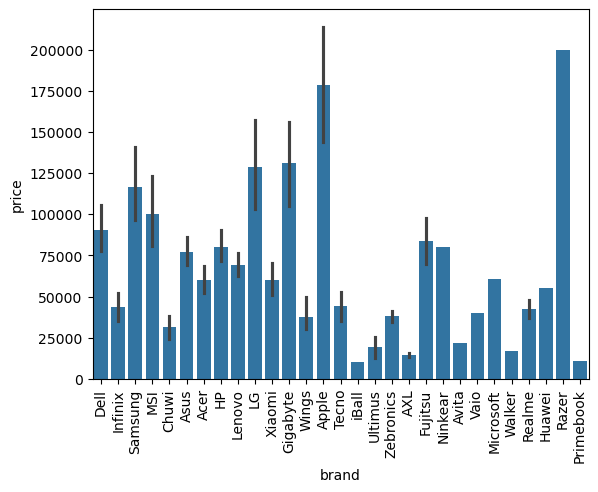

In [24]:
sns.barplot(x=df['brand'], y=df['price'])

plt.xticks(rotation="vertical")

plt.show()

#### This graph provides an overview of how product prices differ across brands. Some brands (like Apple and Gigabyte) tend to have much higher prices, while others (such as PrimeRazer) are on the lower end of the price spectrum. 
#### The error bars suggest that certain brands offer a wide range of prices (e.g., Apple), possibly indicating a diverse product lineup, while others have more consistent pricing.

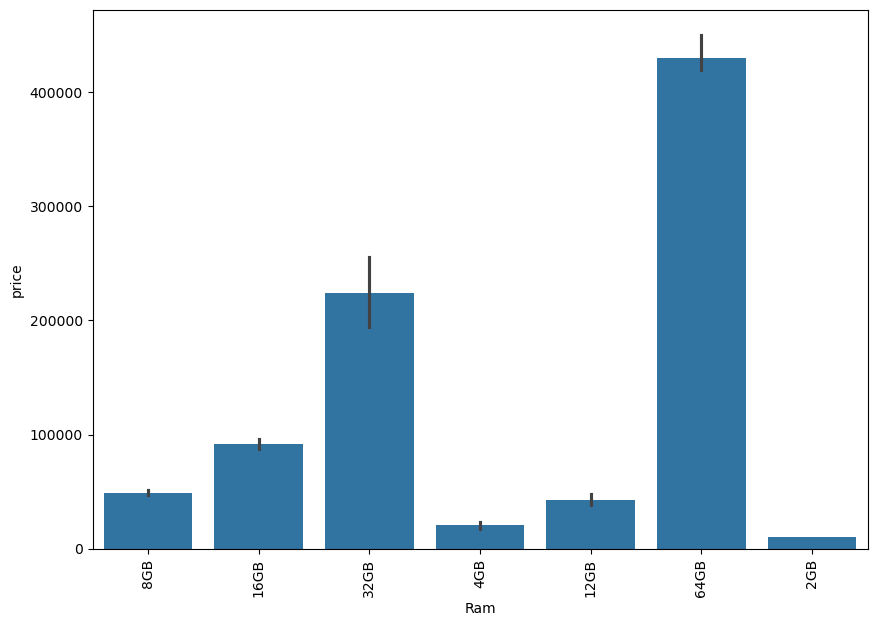

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Ram'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

#### Generally, laptops with higher RAM tend to have higher prices. This is intuitive since more RAM often correlates with better performance, which usually comes at a premium.
#### The price of devices varies with different RAM sizes. 
#### By displaying the average price for each RAM category, we can see which RAM sizes tend to be more expensive and if there are any outliers.If lower RAM sizes have significantly lower prices, it could indicate a budget segment, while higher RAM sizes might represent premium offerings.

## Pie Chart

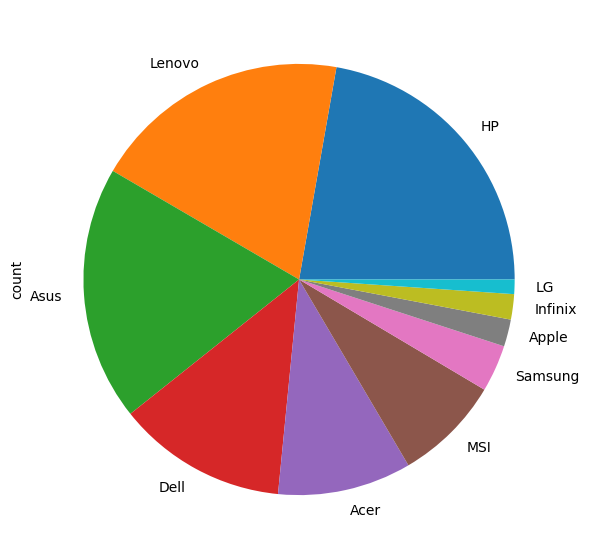

In [26]:
plt.figure(figsize=(10,7))
df['brand'].value_counts().head(10).plot(kind='pie')
plt.show()

#### Dell or HP has the largest slice, it suggests that these brands have a significant presence in the dataset. brands such as  Infinix, Samsung, or Apple, may not compete with the largest brands in terms of volume but may cater to specific customer needs.

In [27]:
df = df[['brand', 'name','spec_rating', 'processor', 'CPU', 'Ram',
       'Ram_type', 'ROM', 'ROM_type',
         'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty','price']]
df

,brand,name,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,price
0,Dell,Inspiron 3501 Laptop,69.323529,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",8GB,DDR4,1TB,Hard-Disk,Intel Iris Xe Graphics,15.6,1920.0,1080.0,Windows 10,1.0,52500
1,Infinix,INBook Y1 Plus XL28 Laptop,69.323529,10th Gen Intel Core i3 1005G1,"Dual Core, 4 Threads",8GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,15.6,1920.0,1080.0,Windows 11,1.0,25990
2,Dell,Inspiron 7430 2 in 1 Touch Laptop,60.000000,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,1TB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1200.0,Windows 11,1.0,95640
3,Samsung,Galaxy Book 3 NP750XFG-KB1IN Laptop,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",8GB,LPDDR4x,512GB,SSD,Intel Iris Xe Graphics,15.6,1920.0,1080.0,Windows 11,1.0,69990
4,Dell,Inspiron 15 3511 Laptop,69.323529,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Integrated UHD Graphics,15.6,1920.0,1080.0,Windows 11,1.0,52990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,Samsung,Galaxy Book 3 Pro 360 NP960QFG-KA3IN Laptop,81.000000,13th Gen Intel Core i7 1360P,"12 Cores (4P + 8E), 16 Threads",16GB,DDR5,1TB,SSD,Intel Iris Xe Graphics,16.0,2880.0,1800.0,Windows 11,1.0,179990
781,Asus,ROG Flow Z13 2023 GZ301VV-MU014WS Gaming Laptop,73.000000,13th Gen Intel Core i9 13900H,"14 Cores (6P + 8E), 20 Threads",16GB,LPDDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,13.4,2560.0,1600.0,Windows 11,1.0,209990
782,MSI,Summit B15 A11M-236IN Laptop,64.000000,11th Gen Intel Core i7 1185G7,"Quad Core, 8 Threads",16GB,DDR4,1TB,SSD,Intel Iris Xe,15.6,1920.0,1080.0,Windows 10,2.0,69990
783,HP,15s-ey2001AU Laptop,63.000000,5th Gen AMD Ryzen 7 5700U,"Octa Core, 16 Threads",16GB,DDR4,512GB,SSD,AMD Radeon Radeon,15.6,1920.0,1080.0,Windows 11,1.0,49990


## Assumption 1: There should be no outliers in the data.
## Boxplot.

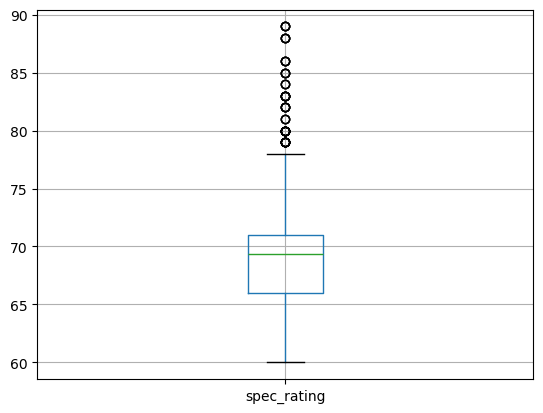

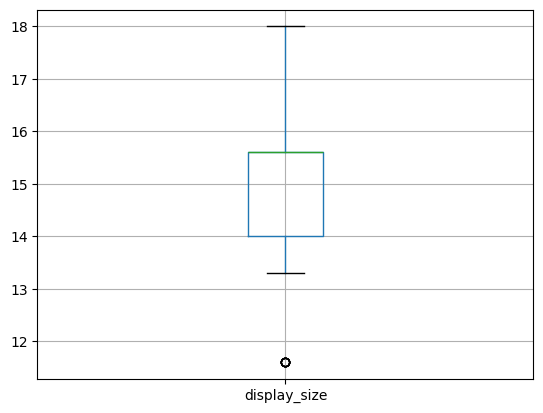

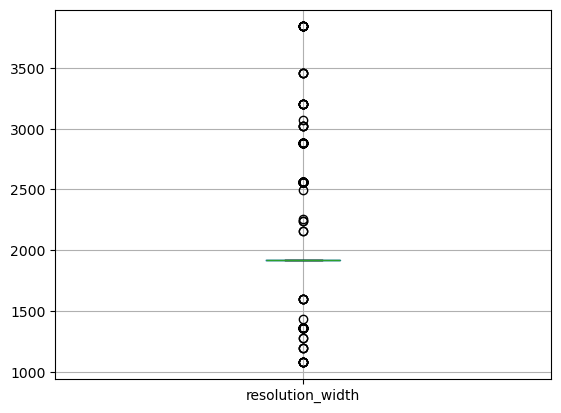

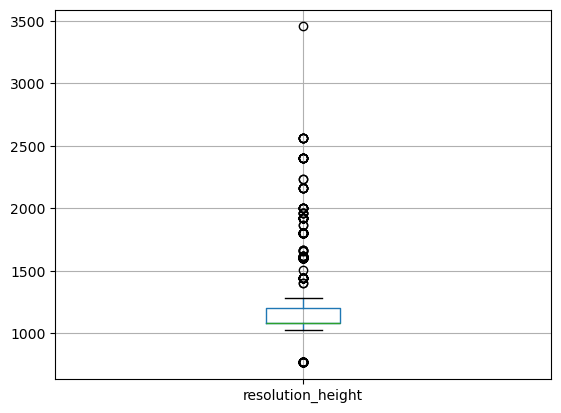

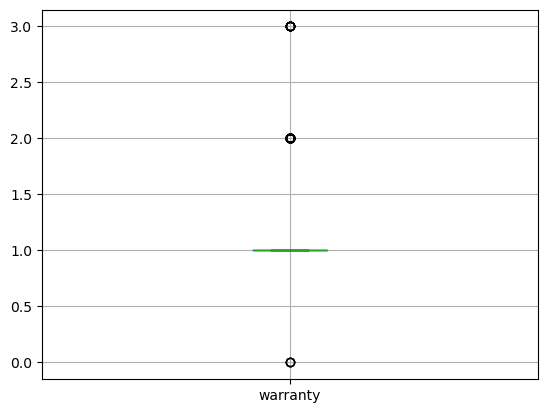

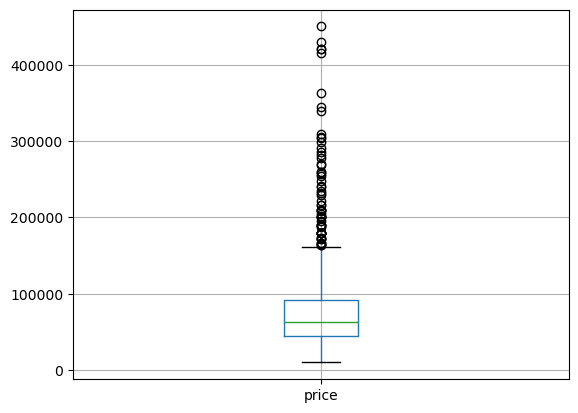

In [28]:
for i in df.columns:
    if df[i].dtype in ['int64','float64']:
        df.boxplot(column=i)
        plt.show()

#### This box plot shows that the spec_ratings are generally clustered around the median of 70, with a relatively small spread of data there are a number of outliers that suggest that the distribution is not perfectly symmetrical.
#### display_sizes are generally clustered around the median of 15, with a relatively small spread of data. However, there is only one outlier present here.
#### resolution_widths are generally clustered around the median of 2000, with a relatively small spread of data. However, there are a number of outliers .
#### warranties are generally clustered around the median of 1, with a relatively small spread of data.



## Assumption 2: 
## Assumption of Linearity: Every ind var should have a linear relationship with the dep var.

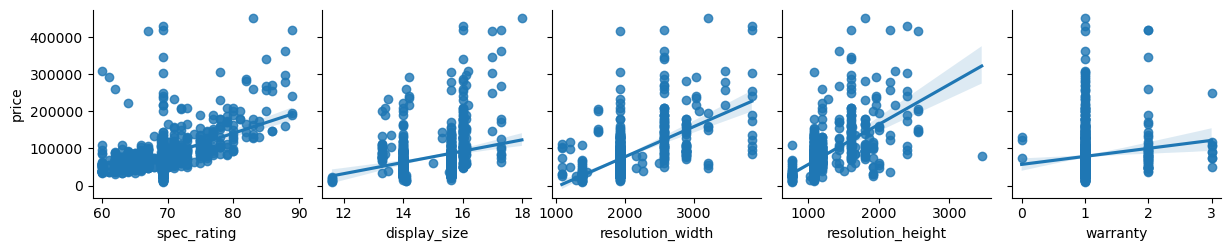

In [29]:
sns.pairplot(df,x_vars=['spec_rating','display_size','resolution_width',
                          'resolution_height','warranty'],
             y_vars=["price"], kind='reg');

#### The analysis shows that spec rating and display size have a positive correlation with price, indicating that higher specs and larger displays tend to increase the price, although the correlations are not very strong. Resolution width and resolution height also show weak positive trends with price, but the data is more dispersed, making the relationship less clear. 
#### There is little to no correlation between warranty length and price, as the data points are scattered and the trend line is almost flat. Overall, while some features affect price more noticeably, others, like warranty, have minimal impact, with notable outliers and variability across the data.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              785 non-null    object 
 1   name               785 non-null    object 
 2   spec_rating        785 non-null    float64
 3   processor          785 non-null    object 
 4   CPU                785 non-null    object 
 5   Ram                785 non-null    object 
 6   Ram_type           785 non-null    object 
 7   ROM                785 non-null    object 
 8   ROM_type           785 non-null    object 
 9   GPU                785 non-null    object 
 10  display_size       785 non-null    float64
 11  resolution_width   785 non-null    float64
 12  resolution_height  785 non-null    float64
 13  OS                 785 non-null    object 
 14  warranty           785 non-null    float64
 15  price              785 non-null    int64  
dtypes: float64(5), int64(1), o

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              108 non-null    object 
 1   name               108 non-null    object 
 2   spec_rating        108 non-null    float64
 3   processor          108 non-null    object 
 4   CPU                108 non-null    object 
 5   Ram                108 non-null    object 
 6   Ram_type           108 non-null    object 
 7   ROM                108 non-null    object 
 8   ROM_type           108 non-null    object 
 9   GPU                108 non-null    object 
 10  display_size       108 non-null    float64
 11  resolution_width   108 non-null    int64  
 12  resolution_height  108 non-null    int64  
 13  OS                 108 non-null    object 
 14  warranty           108 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 12.8+ KB


In [32]:
colname =[]
for x in df.columns:
    if df[x].dtype=="object":
        colname.append(x)



In [33]:
colname1 =[]
for x in df_test.columns:
    if df_test[x].dtype=="object":
        colname1.append(x)

## Performing the Label Encoding to Convert Categorical Column in numerical Column

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname1:
    df_test[x]=le.fit_transform(df_test[x])

## creating X and Y

In [36]:
X = df.values[:,0:-1]
X_test = df_test.values[:,-1]
Y = df.values[:,-1]
Y = Y.astype(int)

## Assumption of Normality: The dependent variable should follow an approximate normal distribution

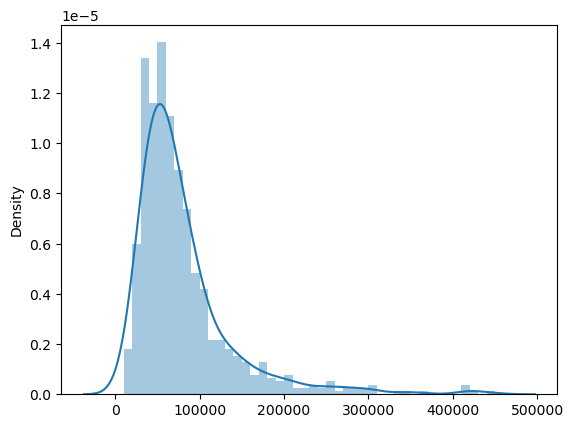

In [37]:
sns.distplot(Y)
plt.show()

### The distribution is right-skewed, meaning there's a longer tail on the right side. This indicates that there are fewer observations with larger values compared to smaller values.

## Log transformation

In [38]:
import numpy as np
Y_log  = np.log(Y)

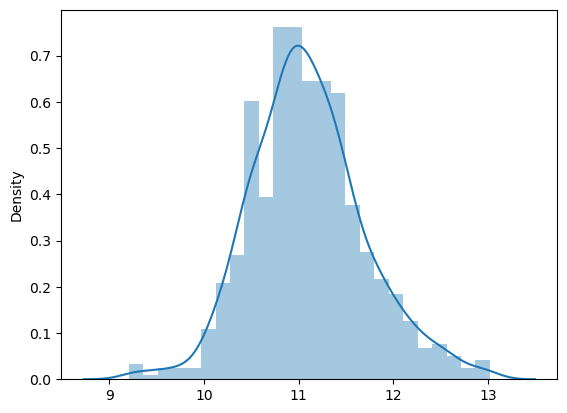

In [39]:
sns.distplot(Y_log,hist=True)
plt.show()

#### After log Transform the data appears to follow a normal (bell-shaped) distribution, centered around a value close to 11.

## Scaling 

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [41]:
from sklearn.preprocessing import StandardScaler

X_test_new = scaler.transform(X)

In [42]:
print(X.shape)
print(Y.shape)

(785, 15)
(785,)


In [43]:
print(X_test_new.shape)

(785, 15)


## Assumption of no multicollinearity: There should be no multicollinearity between the independent variables multicollinearity is the relationship amongst the multiple independent variables

                      brand      name  spec_rating  processor       CPU  \
brand              1.000000 -0.178851     0.008464  -0.131659  0.016681   
name              -0.178851  1.000000     0.041487   0.016468  0.006679   
spec_rating        0.008464  0.041487     1.000000   0.128477 -0.073039   
processor         -0.131659  0.016468     0.128477   1.000000  0.269644   
CPU                0.016681  0.006679    -0.073039   0.269644  1.000000   
Ram               -0.011950 -0.170303    -0.184690  -0.040400  0.179405   
Ram_type           0.037657 -0.126316     0.076549   0.182350 -0.187374   
ROM                0.042222 -0.020579    -0.342203  -0.127166  0.119029   
ROM_type          -0.019732  0.083911     0.038663  -0.005013 -0.064899   
GPU                0.128938 -0.148922    -0.273680  -0.257268 -0.219508   
display_size       0.001871  0.000036     0.274447  -0.105091 -0.019939   
resolution_width  -0.061076  0.212510     0.335269   0.070276 -0.161303   
resolution_height  0.0657

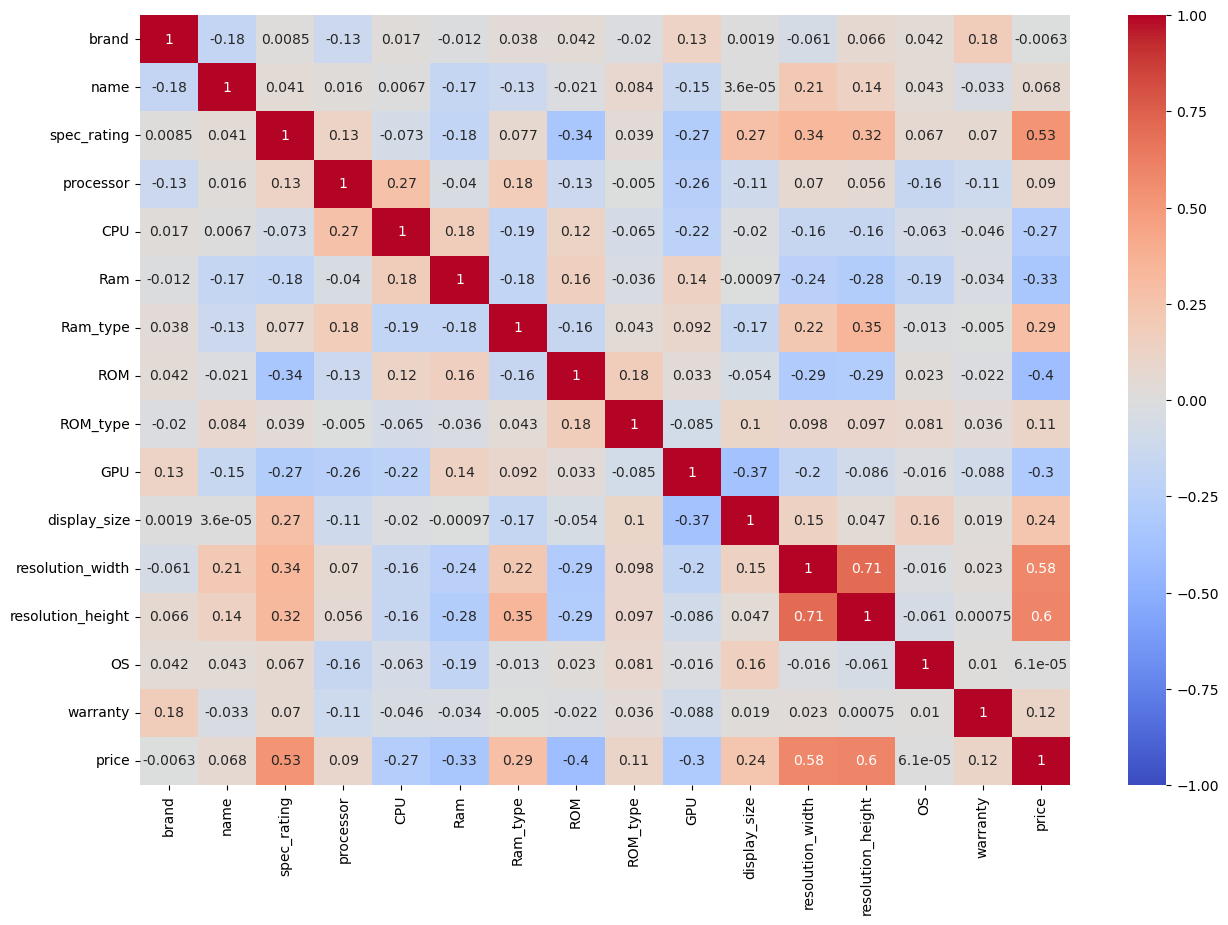

In [44]:
# Ensure x is a DataFrame with numeric features
# For instance, filter for numeric columns only
x = df.select_dtypes(include=[float, int])

# Calculate the Pearson correlation matrix
corr_df = x.corr(method="pearson")

# Print the correlation matrix
print(corr_df)
plt.figure(figsize=(15,10))

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True, cmap='coolwarm')
plt.show()



### resolution_width and resolution_height have a strong positive correlation of 0.71, which makes sense as these variables are likely related to the sizeof the screen. price and spec_rating have a moderate positive correlation of 0.33, suggesting that devices with higher specifications tend to have higher prices.Most other pairs of variables have weak or no correlations, indicating that they are not strongly related to each other.    
### warranty and the other variables have very weak or no correlations, suggesting that warranty length is not strongly related to the other factors.Overall, the correlation matrix shows that the screen resolution dimensions (resolution_width and resolution_height) are strongly correlated,and there is a moderate positive relationship between price and specification rating.

# VIF

In [45]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Assuming X is your feature matrix (e.g., a DataFrame)
# For example:
# X = pd.DataFrame({
#     'feature1': [...],
#     'feature2': [...],
#     ...
# })

vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df = vif_df.round(2)

print(vif_df)


             features  VIF Factor
0               brand        3.85
1                name        4.62
2         spec_rating      191.73
3           processor        4.70
4                 CPU        5.01
5                 Ram        3.45
6            Ram_type        4.64
7                 ROM        7.95
8            ROM_type       49.88
9                 GPU        7.38
10       display_size      201.91
11   resolution_width       55.05
12  resolution_height       37.71
13                 OS       28.39
14           warranty       12.94
15              price        6.92


### Spec Rating (191.73), Display Size , Resolution Width, and ROM Type have extremely high VIF values meaning these features are highly collinear with other variables.
### OS, Resolution Height and Warranty also have high VIF values, indicating significant multicollinearity.
### Features such as RAM Brand and Processor have relatively low VIF values meaning they do not have significant multicollinearity issues.

# Spliting the data into test and train

In [46]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2, random_state=10)


In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(628, 15)
(628,)
(157, 15)
(157,)


# Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

11.08569218552098
[-0.01511447 -0.00515454  0.11376006 -0.03881515 -0.13291126 -0.1447193
  0.06216209 -0.05598355  0.05925837 -0.14849909  0.04647195  0.0685435
  0.13929807  0.00541196  0.04358163]


In [49]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[10.25110349 10.90871553 10.83734075 12.10493798 11.28850828 11.77729598
 10.89413342 10.58059171 11.09751241 11.49609213 10.94580372 10.67110646
 10.41091277 10.49661224 11.23893075 11.51455742 10.80230675 10.85000003
 11.26660117 10.97109786 10.39423599 11.19631961 10.89968766 11.6411691
 11.67585254 10.99761249 10.99288671 11.32876105 11.82371272 11.45998769
 11.37483653 10.28504223 10.4266448  11.04375726 11.04033071 10.79568166
 11.04682872 11.33320556 10.5694881  11.64569338 12.24859486 11.14616001
 10.93166993 10.86403621 10.7053331  10.9979366  11.12379062 11.41768027
 11.32207672 10.32233092 10.75338272 11.130721   11.62948704 10.96983924
 11.40766932 10.57388064 11.0659277  12.37320937 11.45923333 11.28039711
 10.73089488 10.88682163 11.22946612 10.87211278 10.88783381 10.91171176
 11.0549747  10.33672106 10.64139835 11.08095095 10.80737447 10.55378253
 12.32945718 10.65428966 11.92134639 11.4599347  11.34244597 11.04968217
 10.51979179 11.35910229 11.02967493 10.81543221 11.

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6602387883977394
RMSE: 0.33147717144312683
Adj R-square: 0.6536114565719475


# Random Forest Regressor 

In [51]:
from sklearn.ensemble import RandomForestRegressor
 
model_RandomForest=RandomForestRegressor(n_estimators=500,
                                          random_state=10, bootstrap=True, #True for with Feature sampling #False for without Feature sampling
                                         n_jobs=-1)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8490118244570021
RMSE: 0.22097248242405715
Adj R-square: 0.846066671488023


In [53]:
model_RandomForest.feature_importances_

array([0.01900241, 0.02520473, 0.17214141, 0.091248  , 0.07282641,
       0.17644628, 0.01155441, 0.0317773 , 0.00123836, 0.10221539,
       0.01889028, 0.11103612, 0.15551191, 0.00613531, 0.00477169])

In [54]:
sample1=pd.DataFrame()
 
sample1["Column"]=df.columns[0:-1]
sample1["Imp value"]=model_RandomForest.feature_importances_
 
sample1.sort_values("Imp value",ascending=False)

,Column,Imp value
5,Ram,0.176446
2,spec_rating,0.172141
12,resolution_height,0.155512
11,resolution_width,0.111036
9,GPU,0.102215
3,processor,0.091248
4,CPU,0.072826
7,ROM,0.031777
1,name,0.025205
0,brand,0.019002


In [55]:
Y_pred=model_RandomForest.predict(X_test_new)
print(Y_pred)

[10.68702843 10.68702843 10.72358505 10.70119079 10.68529802 10.68529802
 10.68529802 10.68702843 10.70119079 10.72408663 10.72358505 10.68529802
 10.68529802 10.68702843 10.68702843 10.68529802 10.68529802 10.68529802
 10.68529802 10.69954288 10.72531545 10.68529802 10.68702843 10.68702843
 10.72358505 10.68529802 10.68529802 10.68529802 10.68702843 10.68702843
 10.73884421 10.68702843 10.68702843 10.68702843 10.68529802 10.72358505
 10.72531545 10.70070996 10.68529802 10.68702843 10.72358505 10.68529802
 10.68529802 10.68529802 10.68702843 10.73884421 10.68529802 10.68529802
 10.68529802 10.68702843 10.68702843 10.68529802 10.68702843 10.72408663
 10.68702843 10.68702843 10.68702843 10.68702843 10.72358505 10.68529802
 10.68702843 10.68529802 10.68702843 10.68529802 10.72531545 10.68702843
 10.72524128 10.74049212 10.68529802 10.68529802 10.72358505 10.68702843
 10.72408663 10.68529802 10.68529802 10.68529802 10.68529802 10.68702843
 10.68529802 10.68529802 10.68529802 10.68529802 10

In [56]:
Y_pred_new = np.exp(Y_pred)
Y_pred_new

array([43784.20550359, 43784.20550359, 45414.42413787, 44408.70513727,
       43708.50655118, 43708.50655118, 43708.50655118, 43784.20550359,
       44408.70513727, 45437.20879846, 45414.42413787, 43708.50655118,
       43708.50655118, 43784.20550359, 43784.20550359, 43708.50655118,
       43708.50655118, 43708.50655118, 43708.50655118, 44335.58375703,
       45493.07757636, 43708.50655118, 43784.20550359, 43784.20550359,
       45414.42413787, 43708.50655118, 43708.50655118, 43708.50655118,
       43784.20550359, 43784.20550359, 46112.72438211, 43784.20550359,
       43784.20550359, 43784.20550359, 43708.50655118, 45414.42413787,
       45493.07757636, 44387.35711679, 43708.50655118, 43784.20550359,
       45414.42413787, 43708.50655118, 43708.50655118, 43708.50655118,
       43784.20550359, 46112.72438211, 43708.50655118, 43708.50655118,
       43708.50655118, 43784.20550359, 43784.20550359, 43708.50655118,
       43784.20550359, 45437.20879846, 43784.20550359, 43784.20550359,
      

In [57]:
Y_df = pd.DataFrame(Y_pred_new)
Y_df

,0
0,43784.205504
1,43784.205504
2,45414.424138
3,44408.705137
4,43708.506551
...,...
780,44335.583757
781,45414.424138
782,45437.208798
783,43708.506551


In [58]:
Y_df.value_counts()

43708.506551    324
43784.205504    240
45414.424138     71
45493.077576     39
45437.208798     28
45489.703478     17
44335.583757     17
44387.357117      9
46112.724382      9
47264.689276      8
44408.705137      6
45639.277523      6
44460.563885      5
45440.941789      1
45718.320386      1
46125.589662      1
46166.573017      1
46188.776748      1
47319.295287      1
Name: count, dtype: int64

### so we have used two algorithms linear Regression and Random Forest Regressor and we can see that Random Forest Regressor has outperform linear Regression.
### so we can conclude that Random Forest Regressor is our best model.

# Exporting the Results into csv

In [59]:
Y_df.to_csv("results.csv",index=None)